Введіть шлях до папки:  D:\images



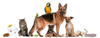
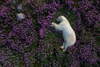
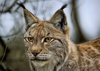
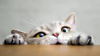
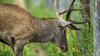
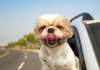
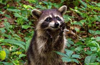
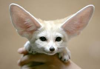
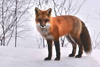
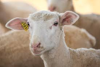
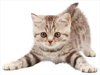
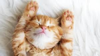
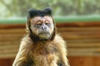
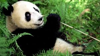
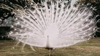
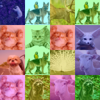

In [9]:
import os
import glob
import pandas as pd
from PIL import Image
from IPython.display import display, HTML
import base64
from io import BytesIO

def generate_thumbnail(image_path):
    with Image.open(image_path) as img:
        img.thumbnail((100, 100))  
        buffered = BytesIO()
        img.save(buffered, format="PNG")
        encoded = base64.b64encode(buffered.getvalue()).decode('utf-8')
        return f'<img src="data:image/png;base64,{encoded}"/>'

def analyze_image_folder(folder_path):
    image_files = glob.glob(os.path.join(folder_path, "*"))

    data = []

    for file_path in image_files:
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                file_format = img.format
                channels = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)  
                width, height = img.size
                thumbnail = generate_thumbnail(file_path)

                data.append({
                    "File Name": file_name,
                    "Color Model": color_model,
                    "Format": file_format,
                    "Channels": channels,
                    "File Size (MB)": file_size,
                    "Width": width,
                    "Height": height,
                    "Full Path": file_path,
                    "Thumbnail": thumbnail
                })
        except Exception as e:
            continue

    df = pd.DataFrame(data)
    
    pd.set_option('display.max_colwidth', None)
    df_html = df.to_html(escape=False, index=False)
    display(HTML(df_html))

    return df

folder_path = input("Введіть шлях до папки: ").strip()


if os.path.isdir(folder_path):
    result_df = analyze_image_folder(folder_path)
else:
    print("Помилка: вказана папка не існує. Будь ласка, перевірте шлях і спробуйте знову.")


Введіть шлях до папки з зображеннями:  D:\images
Введіть назву для постера:  poster.png
Введіть кількість зображень у рядку:  4
Введіть кількість зображень у стовпчику:  4


Poster saved as D:\images\poster.png


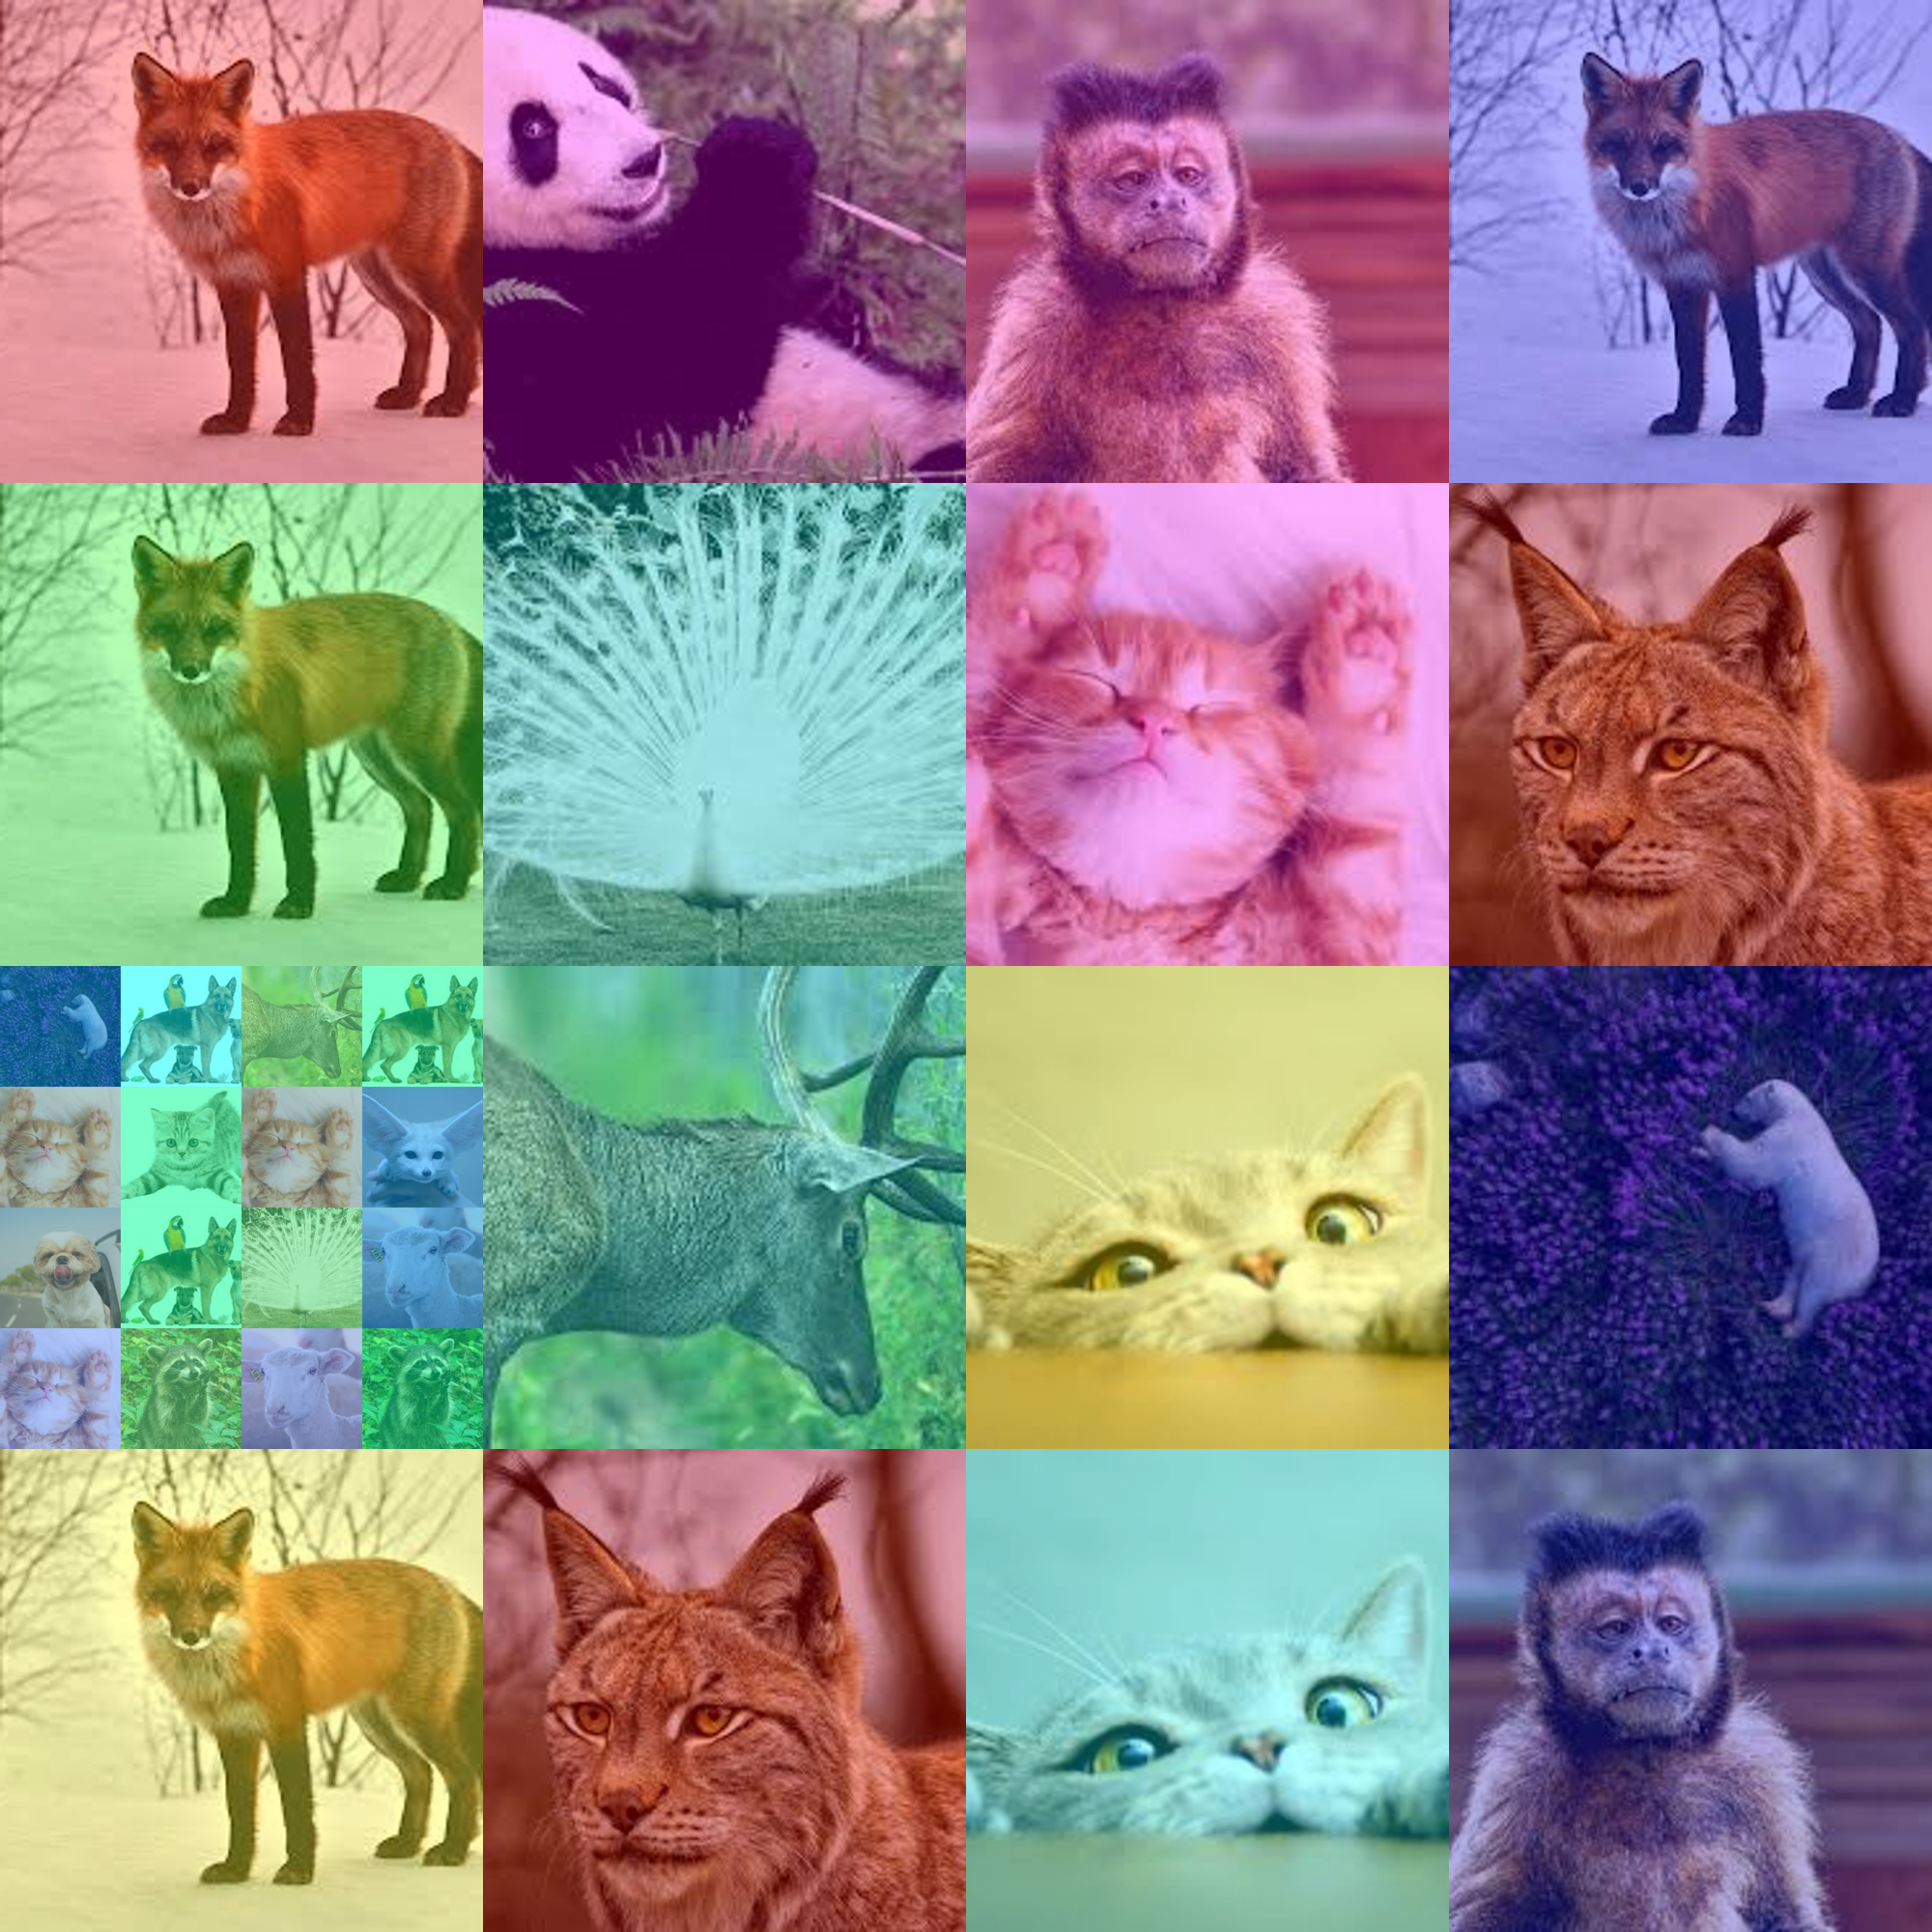

In [10]:
import os
import random
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
from IPython.display import display

def crop_to_square(image):
   
    width, height = image.size
    min_side = min(width, height)
    left = (width - min_side) // 2
    top = (height - min_side) // 2
    right = left + min_side
    bottom = top + min_side
    return image.crop((left, top, right, bottom))

def apply_random_filter(image):
    
    filters = ["red", "green", "blue", "yellow", "magenta", "cyan"]
    filter_choice = random.choice(filters)
    
    if filter_choice == "red":
        overlay = Image.new("RGB", image.size, (255, 0, 0))
    elif filter_choice == "green":
        overlay = Image.new("RGB", image.size, (0, 255, 0))
    elif filter_choice == "blue":
        overlay = Image.new("RGB", image.size, (0, 0, 255))
    elif filter_choice == "yellow":
        overlay = Image.new("RGB", image.size, (255, 255, 0))
    elif filter_choice == "magenta":
        overlay = Image.new("RGB", image.size, (255, 0, 255))
    elif filter_choice == "cyan":
        overlay = Image.new("RGB", image.size, (0, 255, 255))
    
    return Image.blend(image, overlay, alpha=0.3)

def create_poster(folder_path, output_name, cols, rows, image_size=500):
  
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    if not image_files:
        print("No valid images found in the folder.")
        return

    
    poster_width = cols * image_size
    poster_height = rows * image_size
    poster = Image.new("RGB", (poster_width, poster_height), (255, 255, 255))
    
    for row in range(rows):
        for col in range(cols):
            random_image_path = os.path.join(folder_path, random.choice(image_files))
            with Image.open(random_image_path) as img:
                img = crop_to_square(img)
                img = img.resize((image_size, image_size))
                img = apply_random_filter(img)
                x = col * image_size
                y = row * image_size
                poster.paste(img, (x, y))
    
    output_path = os.path.join(folder_path, output_name)
    poster.save(output_path)
    print(f"Poster saved as {output_path}")

    display(poster)

folder_path = input("Введіть шлях до папки з зображеннями: ").strip()
output_name = input("Введіть назву для постера: ").strip()
cols = int(input("Введіть кількість зображень у рядку: "))
rows = int(input("Введіть кількість зображень у стовпчику: "))

if os.path.isdir(folder_path):
    create_poster(folder_path, output_name, cols, rows)
else:
    print("Помилка: вказана папка не існує. Будь ласка, перевірте шлях і спробуйте знову.")
